### Nome: Emanuel Piveta Pozzobon
#### Turma: GAMA
#### ID: 24039

#### _<center>Ilum - Escola de Ciência. Campinas, SP. 2024</center>_

------------

### Monstrinho 3.6 - A curva de aprendizado:

**Objetivo:**
Implemente o registro da curva de aprendizado tanto dos dados de treino
quanto de validação no código de redes neurais feito em Python puro nesta disciplina.
Além de implementar, treine um modelo de rede neural em um conjunto de dados qualquer
e mostre e interprete o gráfico das curvas de aprendizado.

**Comentário:**
Observe que o enunciado diz claramente que é para realizar a tarefa na
rede neural feita em Python puro nos vídeos da disciplina. Se você está usando o PyTorch,
numpy, tensorflow, keras, lightning ou qualquer outra biblioteca pronta, você está no
caminho errado!

----

### Introdução:

Vamos realizar uma curva de aprendizado, que de forma resumida é um gráfico que no eixo x está o o número de épocas do treinamento da rede neural, e no eixo y o valor da loss em cada época. Vamos criar essa curva de aprendizado de forma que plote tanto a loss dos dados de treinamento como dos dados de validação e isso permite averiguar se o modelo se tornou sobreajustado ou não, por exemplo, pois se a loss reduzir muito para o treinamento e não ocorrer o mesmo para validação, isso insinua que o modelo de rede neural se tornou incapaz de analisar outros dados que não sejam aqueles de treinamento. 

----

### Resolução:

In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
import seaborn as sns

C:\Users\emanuel24039\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Vamos primeiramente escolher um conjunto de dados e separar entre dados de treino e teste. E também prever massa do corpo em gramas a partir dos atributos dos comprimentos dos corpos de um dataset de pinguins.

Constantes importantes:

In [2]:
TAMANHO_TESTE = 0.1
TAMANHO_VALIDACAO = 0.1
SEMENTE_ALEATORIA = 777
NUM_EPOCAS = 30

In [3]:
ATRIBUTOS = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]
TARGET = ["body_mass_g"]

df = sns.load_dataset("penguins")
df = df.reindex(ATRIBUTOS + TARGET, axis=1)
df = df.dropna()
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [4]:
indices = df.index 
indices_treino_val, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

# Dados de treino e validação
df_treino_val = df.loc[indices_treino_val]
df_teste = df.loc[indices_teste]
print(f"Dados de X treino e validação: {df_treino_val}, comprimento de {len(df_treino_val)}")

#definir x, y teste
X_teste = df_teste.reindex(ATRIBUTOS, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values
print(f"Dados de X teste: {X_teste}, comprimento de {len(X_teste)}")
print(f"Dados de y teste: {y_teste}, comprimento de {len(y_teste)}")

Dados de X treino e validação:      bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
102            37.7           16.0              183.0       3075.0
111            45.6           20.3              191.0       4600.0
20             37.8           18.3              174.0       3400.0
192            49.0           19.5              210.0       3950.0
148            36.0           17.8              195.0       3450.0
..              ...            ...                ...          ...
72             39.6           17.2              196.0       3550.0
88             38.3           19.2              189.0       3950.0
60             35.7           16.9              185.0       3150.0
304            44.9           13.8              212.0       4750.0
104            37.9           18.6              193.0       2925.0

[307 rows x 4 columns], comprimento de 307
Dados de X teste: [[ 50.8  18.5 201. ]
 [ 37.6  17.  185. ]
 [ 49.1  14.5 212. ]
 [ 34.1  18.1 193. ]
 [ 45.4  18.7 188. 

In [5]:
indices = df_treino_val.index
indices_treino, indices_val = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_val = df.loc[indices_val]
print(f"Dataset do treino {df_treino}, com comprimento de {len(df_treino)}")
print(f"Dataset da validação{df_val}, com comprimento de {len(df_val)}")

X_treino = df_treino.reindex(ATRIBUTOS, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values

X_val = df_val.reindex(ATRIBUTOS, axis=1).values
y_val = df_val.reindex(TARGET, axis=1).values

Dataset do treino      bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
69             41.8           19.4              198.0       4450.0
66             35.5           16.2              195.0       3350.0
81             42.9           17.6              196.0       4700.0
312            45.5           14.5              212.0       4750.0
184            42.5           16.7              187.0       3350.0
..              ...            ...                ...          ...
168            50.3           20.0              197.0       3300.0
193            46.2           17.5              187.0       3650.0
161            51.3           19.9              198.0       3700.0
88             38.3           19.2              189.0       3950.0
115            42.7           18.3              196.0       4075.0

[276 rows x 4 columns], com comprimento de 276
Dataset da validação     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
60             35.7           16.9         

In [6]:
x_scaler = MaxAbsScaler()
x_scaler.fit(X_treino)

y_scaler = MaxAbsScaler()
y_scaler.fit(y_treino)

X_treino = x_scaler.transform(X_treino)
y_treino = y_scaler.transform(y_treino)

X_val = x_scaler.transform(X_val)
y_val = y_scaler.transform(y_val)

X_teste = x_scaler.transform(X_teste)
y_teste = y_scaler.transform(y_teste)

Agora que os dados estão pronto é necessário aplicar a rede neural nesse conjunto de dados e ao mesmo tempo armazenar os resultados os dados da rede neural de forma que seja possível plotar em gráfico os resultados de validação e treino, para verificar a evolução de aprendizado da rede neural. Vamos fazer isso para uma rede neural utilizando a função linear como função ativação.

In [7]:
from graphviz import Digraph


def _tracar(folha):
    """Função modificada da criada por Andrej Karpathy para construção de grafo.

    Referência: https://github.com/karpathy/micrograd

    """
    vertices = set()
    arestas = set()

    def construir(v):
        """Função recursiva para traçar o grafo."""
        if v not in vertices:
            vertices.add(v)
            for progenitor in v.progenitor:
                arestas.add((progenitor, v))
                construir(progenitor)

    construir(folha)

    return vertices, arestas


def plota_grafo(folha):
    """Função modificada da criada por Andrej Karpathy para construção de grafo.

    Referência: https://github.com/karpathy/micrograd

    """
    grafo = Digraph(format="svg", graph_attr={"rankdir": "LR"})
    vertices, arestas = _tracar(folha)

    for v in vertices:
        id_vertice = str(id(v))

        if hasattr(v, "rotulo") and (hasattr(v, "grad")):
            texto = "{ " + f"{v.rotulo} | data {v.data:.3f} | grad {v.grad:.3f}" + " }"

        elif hasattr(v, "rotulo"):
            texto = "{ " + f"{v.rotulo} | data {v.data:.3f}" + " }"

        else:
            texto = "{ " + f"data {v.data:.3f}" + " }"

        grafo.node(name=id_vertice, label=texto, shape="record")

        if v.operador_mae:
            grafo.node(name=id_vertice + v.operador_mae, label=v.operador_mae)
            grafo.edge(id_vertice + v.operador_mae, id_vertice)

    for vertice1, vertice2 in arestas:
        grafo.edge(str(id(vertice1)), str(id(vertice2)) + vertice2.operador_mae)

    return grafo

In [8]:
import math

class Valor_linear:
    def __init__(self, data, progenitor=(), operador_mae="", rotulo=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae
        self.rotulo = rotulo
        self.grad = 0

    def __repr__(self):
        return f"Valor(data={self.data})"
    
    def __add__(self, outro_valor):
        """Realiza a operação: self + outro_valor."""
        
        if not isinstance(outro_valor, Valor_linear):
            outro_valor = Valor_linear(outro_valor)
            
        progenitor = (self, outro_valor)
        data = self.data + outro_valor.data
        operador_mae = "+"
        resultado = Valor_linear(data, progenitor, operador_mae)
        
        def propagar_adicao():
            self.grad += resultado.grad
            outro_valor.grad += resultado.grad
            
        resultado.propagar = propagar_adicao
        
        return resultado
    
    def __mul__(self, outro_valor):
        """Realiza a operação: self * outro_valor."""
        
        if not isinstance(outro_valor, Valor_linear):
            outro_valor = Valor_linear(outro_valor)
            
        progenitor = (self, outro_valor)
        data = self.data * outro_valor.data
        operador_mae = "*"
        resultado = Valor_linear(data, progenitor, operador_mae)
        
        def propagar_multiplicacao():
            self.grad += resultado.grad * outro_valor.data # grad_filho * derivada filho em relação a mãe
            outro_valor.grad += resultado.grad * self.data
            
        resultado.propagar = propagar_multiplicacao
        
        return resultado
    
    def exp(self):
        """Realiza a operação: exp(self)"""
        progenitor = (self, )
        data = math.exp(self.data)
        operador_mae = "exp"
        resultado = Valor_linear(data, progenitor, operador_mae)
        
        def propagar_exp():
            self.grad += resultado.grad * data 
        
        resultado.propagar = propagar_exp
        
        return resultado
    
    def __pow__(self, expoente):
        """Realiza a operação: self ** expoente"""
        assert isinstance(expoente, (int, float))
        progenitor = (self, )
        data = self.data ** expoente
        operador_mae = f"**{expoente}"
        resultado = Valor_linear(data, progenitor, operador_mae)
        
        def propagar_pow():
            self.grad += resultado.grad * (expoente * self.data ** (expoente - 1))
        
        resultado.propagar = propagar_pow
        
        return resultado
    
    def __truediv__(self, outro_valor):
        """Realiza a operação: self / outro_valor"""
        return self * outro_valor ** (-1)
    
    def __neg__(self):
        """Realiza a operação: -self"""
        return self * -1
    
    def __sub__(self, outro_valor):
        """Realiza a operação: self - outro_valor"""
        return self + (-outro_valor)
    
    def __radd__(self, outro_valor):
        """Realiza a operação: outro_valor + self"""
        return self + outro_valor
    
    def __rmul__(self, outro_valor):
        """Realiza a operação: outro_valor * self"""
        return self * outro_valor
    
    def sig(self):
        """Realiza a operação: exp(self) / (exp(self) + 1)"""
        return self.exp() / (self.exp() + 1)
    
    def linear(self):
        """Realaza a operação: self"""
        return self
    
    def propagar(self):
        pass
    
    def propagar_tudo(self):
        
        self.grad = 1
        
        ordem_topologica = []
        
        visitados = set()

        def constroi_ordem_topologica(v):
            if v not in visitados:
                visitados.add(v)
                for progenitor in v.progenitor:
                    constroi_ordem_topologica(progenitor)
                ordem_topologica.append(v)

        constroi_ordem_topologica(self)
        
        for vertice in reversed(ordem_topologica):
            vertice.propagar()

In [9]:
import random

#Construir um único neurônio
class Neuronio_linear:
    '''
    -> função que calcula sigma(x) de um único neurônio
    
    __init__
    -> num_dados_entrada = 2, se eu tiver as informações h e f, olhe seu caderno
    -> self.vies = b
    -> self.pesos = w_1 e w_2 em uma lista
    
    __call__ = Neurônio(x)
    -> a própria instância da classe neurônio chama uma função em que x é uma lista contendo as informações que entrarão
    -> x = [h,f]
    
    '''
    
    # pq a função de ativação e as informações entrada também não devem ser ser computadas como instâncias da classe valor?
    def __init__(self, num_dados_entrada):
        self.vies = Valor_linear(random.uniform(-1, 1)) #b
        
        self.pesos = [] #w1, w2
        for i in range(num_dados_entrada):
            self.pesos.append(Valor_linear(random.uniform(-1, 1)))
            
    def __call__(self, x): #lista x contendo as informações
        #calcular o dado de sáida
        
        assert len(x) == len(self.pesos)
        
        soma = 0
        for info_entrada, peso_interno in zip(x, self.pesos):
            soma += info_entrada * peso_interno
            
        soma += self.vies  
        dado_de_saida = soma.linear() #aplicação da função linear na soma
        
        return dado_de_saida       
    
    def parametros(self):
        return self.pesos + [self.vies]

In [10]:
class Camada_linear:
    '''
    -> função que monta uma fileira inteira de neurônio, por exemplo, na representação abaixo queremos montar os neurônios
    da camada Hidden Layer:
    
    Input Layer      Hidden Layer     Output Layer
    (x1)              (h1)             (y)
     O  -------------  O  -------------- O
    (x2)              (h2)             
     O  -------------  O  
    (x3)              (h3)  
     O  -------------  O  
    (x4)              (h4)  
     O  -------------  O  
     
    -> num_neuronios = número de neurônios necessários para construir a camada, na representação são 4.
    
    __call__
    -> computa todos os dados de saída da camada, se fosse montado a Hidden Layer, o output seria apenas y.
    
    '''
    
    def __init__(self, num_neuronios, num_dados_entrada):
        neuronios = []
        
        for _ in range(num_neuronios):
            # Cria neurônio por neurônio usando a classe Neurônio
            neuronio = Neuronio_linear(num_dados_entrada)
            neuronios.append(neuronio)
            
        self.neuronios = neuronios     
    
    # Função para computar todos os dados de saída da camada
    def __call__(self, x):
        dados_de_saida = []
        
        for neuronio in self.neuronios:
            informacao = neuronio(x)
            dados_de_saida.append(informacao)
            
        if len(dados_de_saida) == 1:
            return dados_de_saida[0]
        else:        
            return dados_de_saida  
    
    def parametros(self):
        params = []
        
        for neuronio in self.neuronios:
            params_neuronio = neuronio.parametros()
            params.extend(params_neuronio)
        
        return params

In [11]:
class MLP_linear:
    '''
    classe que constrói toda uma rede neural baseado nas classes anteriores
    
    -> num_dados_entrada = seriam as informações iniciais nos neurônios que não aplicam funções, 
    na representação abaixo é 4.
    
        Input Layer      Hidden Layer     Output Layer
    (x1)              (h1)             (y)
     O  -------------  O  -------------- O
    (x2)              (h2)             
     O  -------------  O  
    (x3)              (h3)  
     O  -------------  O  
    (x4)              (h4)  
     O  -------------  O  
     
    -> num_neuronios_por_camada = lista contendo em cada index o número de neurônios por camada, na representação acima
    seria [4, 1]
    
    __call__
    -> Contabiliza y da rede neural.
    '''
    def __init__(self, num_dados_entrada, num_neuronios_por_camada):
        
        # o python concatena duas lista sendo somadas, no caso acima seria [4, 4, 1]
        percurso = [num_dados_entrada] + num_neuronios_por_camada
        
        camadas = []
        
        for i in range(len(num_neuronios_por_camada)):
            camada = Camada_linear(num_neuronios_por_camada[i], percurso[i])
            camadas.append(camada)
            
        self.camadas = camadas
        
    def __call__(self, x):
        for camada in self.camadas:
            # cada neurônio criado em Camadas receberá todas as informações de x
            x = camada(x)
        return x
    
    def parametros(self):
        params = []
        
        for camada in self.camadas:
            parametros_camada = camada.parametros()
            params.extend(parametros_camada)
            
        return params

In [12]:
NUM_DADOS_DE_ENTRADA = 3  
NUM_DADOS_DE_SAIDA = 1    
CAMADAS_OCULTAS = [3, 4, 3]  

arquitetura_da_rede = CAMADAS_OCULTAS + [NUM_DADOS_DE_SAIDA]

minha_mlp = MLP_linear(NUM_DADOS_DE_ENTRADA, arquitetura_da_rede)

In [13]:
NUM_EPOCAS = 200
TAXA_DE_APRENDIZADO = 10e-6

loss_lista = []
loss_val_lista = []
for epoca in range(NUM_EPOCAS):
    # forward pass
    y_pred = []
    y_pred_val = []
    
    for exemplo in X_treino:
        previsao = minha_mlp(exemplo)
        y_pred.append(previsao)

    #aplicar a rede neural atual em cada dado da X_val
    for exemplo_val in X_val:
        previsao_val = minha_mlp(exemplo_val)
        y_pred_val.append(previsao_val)
        
    # loss
    erros = []
    erros_val = []
    
    for yt, yp in zip(y_treino, y_pred):
        residuo = yp - yt
        erro_quadratico = residuo ** 2
        erros.append(erro_quadratico)        
    loss = sum(erros)
    loss_lista.append(loss.data)
    
    for yt_val, yp_val in zip(y_val, y_pred_val):
        residuo_val = yp_val - yt_val
        erro_quadratico_val = residuo_val ** 2
        erros_val.append(erro_quadratico_val)
    loss_val = sum(erros_val)
    loss_val_lista.append(loss_val.data)

    # zero grad
    for p in minha_mlp.parametros():
        p.grad = 0

    # backpropagation
    loss.propagar_tudo()

    # atualiza parâmetros
    for p in minha_mlp.parametros():
        p.data = p.data - p.grad * TAXA_DE_APRENDIZADO

    # mostra resultado (opcional)
    print(epoca, loss.data)

0 [147.3477839]
1 [125.71186997]
2 [107.633753]
3 [92.46723926]
4 [79.70107823]
5 [68.92602636]
6 [59.81116357]
7 [52.08655632]
8 [45.53035737]
9 [39.95906136]
10 [35.22004135]
11 [31.18575866]
12 [27.7492174]
13 [24.82035725]
14 [22.32316229]
15 [20.19332281]
16 [18.37632908]
17 [16.82590591]
18 [15.50271896]
19 [14.37329966]
20 [13.40914739]
21 [12.5859766]
22 [11.88308336]
23 [11.28281056]
24 [10.77009547]
25 [10.33208617]
26 [9.95781563]
27 [9.63792466]
28 [9.36442597]
29 [9.13050308]
30 [8.93033889]
31 [8.75896941]
32 [8.61215892]
33 [8.48629337]
34 [8.37828944]
35 [8.28551678]
36 [8.20573166]
37 [8.13702034]
38 [8.07775064]
39 [8.02653066]
40 [7.98217346]
41 [7.943667]
42 [7.9101484]
43 [7.88088201]
44 [7.85524069]
45 [7.83268983]
46 [7.81277372]
47 [7.79510392]
48 [7.77934937]
49 [7.76522788]
50 [7.75249894]
51 [7.7409576]
52 [7.73042917]
53 [7.72076478]
54 [7.71183756]
55 [7.70353939]
56 [7.69577813]
57 [7.68847526]
58 [7.68156386]
59 [7.6749869]
60 [7.66869579]
61 [7.66264911]

In [14]:
print(loss_lista)

[array([147.3477839]), array([125.71186997]), array([107.633753]), array([92.46723926]), array([79.70107823]), array([68.92602636]), array([59.81116357]), array([52.08655632]), array([45.53035737]), array([39.95906136]), array([35.22004135]), array([31.18575866]), array([27.7492174]), array([24.82035725]), array([22.32316229]), array([20.19332281]), array([18.37632908]), array([16.82590591]), array([15.50271896]), array([14.37329966]), array([13.40914739]), array([12.5859766]), array([11.88308336]), array([11.28281056]), array([10.77009547]), array([10.33208617]), array([9.95781563]), array([9.63792466]), array([9.36442597]), array([9.13050308]), array([8.93033889]), array([8.75896941]), array([8.61215892]), array([8.48629337]), array([8.37828944]), array([8.28551678]), array([8.20573166]), array([8.13702034]), array([8.07775064]), array([8.02653066]), array([7.98217346]), array([7.943667]), array([7.9101484]), array([7.88088201]), array([7.85524069]), array([7.83268983]), array([7.812

N temos uma lista python, mas o arrays NumPy com um único valor escalar dentro de cada um, ou seja, cada elemento é algo como array([817.45995094]), o que fica depois um pouco difícil de plotar, dessa forma, vamos transformar em uma lista python.

In [15]:
loss_lista_python = []
for i in loss_lista:
    loss_lista_python.append(float(i))

loss_val_lista_python = []
for i in loss_val_lista:
    loss_val_lista_python.append(float(i))

C:\Users\emanuel24039\AppData\Local\Temp\ipykernel_36588\2444902414.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  loss_lista_python.append(float(i))
C:\Users\emanuel24039\AppData\Local\Temp\ipykernel_36588\2444902414.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  loss_val_lista_python.append(float(i))


Dessa forma, é necessário transformar em um número

Text(0, 0.5, 'Loss')

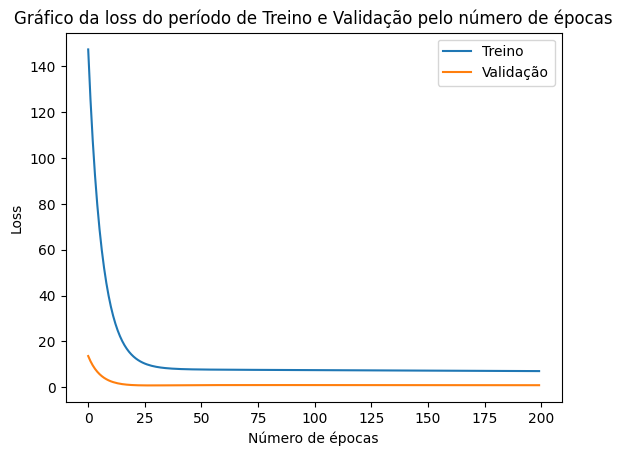

In [16]:
import matplotlib.pyplot as plt 

epocas = list(range(NUM_EPOCAS))
plt.plot(epocas, loss_lista_python, label = 'Treino')
plt.plot(epocas, loss_val_lista_python, label = 'Validação')
plt.legend()
plt.title("Gráfico da loss do período de Treino e Validação pelo número de épocas")
plt.xlabel("Número de épocas")
plt.ylabel("Loss")

-------

### Conclusão:

Segue abaixo o gráfico da curva de validação adquirido uma vez que o código foi rodado:

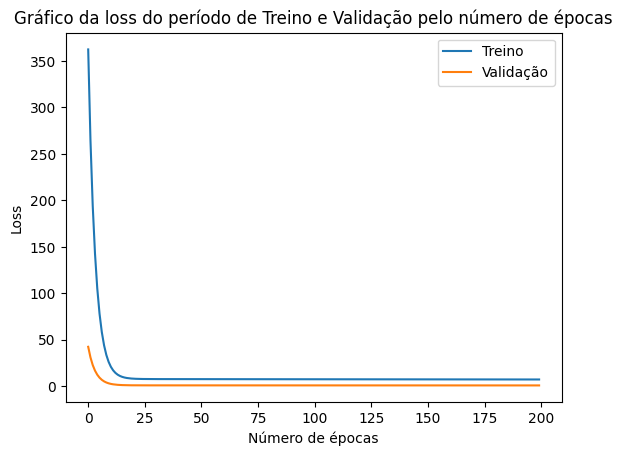

Foi obtido um gráfico do número de épocas que a rede neural foi colocada em treinamento, isto é, 200 épocas; pelo valor da loss obtida em cada época de treinamento e na validação desse treinamento. É possível visualizar que a rede neural não realizou um chamado sobreajuste nesse caso, ou seja, quando o modelo se ajusta muito bem aos dados de treinamento, mas a outros dados ela não se comporta bem. Ocorreu o contrário, a rede neural se mostrou eficaz também na validação mesmo usando uma função de ativação linear.